<a href="https://colab.research.google.com/github/twishi03/Data/blob/main/HER2%2B_Clinical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip install umap-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap.umap_ as umap # Import UMAP from the correct package umap-learn
   #You can then call UMAP as umap.UMAP()
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor

In [4]:
# Load the data
rna_seq_data = pd.read_csv('/content/tcga.brca.rsem.csv')
copy_number_data = pd.read_csv('/content/brca_tcga_erbb2_copy_number.csv')
clinical_data = pd.read_csv('/content/brca_tcga_clinical_data.csv')

# Merge the datasets based on a common identifier (e.g., patient ID)
merged_data = rna_seq_data.merge(copy_number_data, on='patient_id')
merged_data = merged_data.merge(clinical_data, on='patient_id')

# Handle missing values
merged_data.fillna(np.nan, inplace=True)



In [5]:
clinical_data

,patient_id,Sample ID,Diagnosis Age,American Joint Committee on Cancer Metastasis Stage Code,Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,American Joint Committee on Cancer Tumor Stage Code,Brachytherapy first reference point administered total dose,Cancer Type,...,Staging System,Staging System.1,Surgery for positive margins,Surgery for positive margins other,Surgical procedure first,Time between clamping and freezing,Time between excision and freezing,Tissue Source Site,Person Neoplasm Status,Vial number
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55.0,MX,NX,Stage X,6th,TX,NaN,NaN,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,NaN,NaN,3C,WITH TUMOR,A
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50.0,M0,N1a,Stage IIB,6th,T2,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Lumpectomy,NaN,NaN,3C,TUMOR FREE,A
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62.0,M0,N1a,Stage IIB,7th,T2,NaN,Breast Cancer,...,NaN,NaN,NaN,NaN,Modified Radical Mastectomy,NaN,NaN,3C,TUMOR FREE,A
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52.0,M0,N0 (i+),Stage IA,7th,T1c,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Simple Mastectomy,NaN,NaN,3C,TUMOR FREE,A
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50.0,M0,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,NaN,NaN,4H,TUMOR FREE,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,TCGA-WT-AB44,TCGA-WT-AB44-01,77.0,MX,N0 (i-),Stage IA,7th,T1c,NaN,Breast Cancer,...,No axillary staging,NaN,NaN,NaN,Lumpectomy,NaN,NaN,WT,TUMOR FREE,A
1104,TCGA-XX-A899,TCGA-XX-A899-01,46.0,MX,N2a,Stage IIIA,7th,T1c,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,NaN,NaN,XX,TUMOR FREE,A
1105,TCGA-XX-A89A,TCGA-XX-A89A-01,68.0,MX,N0,Stage IIB,7th,T3,NaN,Breast Cancer,...,NaN,NaN,NaN,NaN,Simple Mastectomy,NaN,NaN,XX,TUMOR FREE,A
1106,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,61.0,MX,N1a,Stage IIIA,6th,T3,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,NaN,NaN,Z7,TUMOR FREE,A


In [6]:
rna_seq_data

,patient_id,bcr_patient_barcode,sample_type,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A-11R-A41B-07,Primary Tumor,197.0897,0.0000,0.0000,102.9634,1.3786,5798.3746,68.2424,...,129.5917,1007.7824,1658.4983,258.4941,1208.3738,3507.2482,1894.9342,1180.4565,1.7233,0.0000
1,TCGA-3C-AALI,TCGA-3C-AALI-01A-11R-A41B-07,Primary Tumor,237.3844,0.0000,0.0000,70.8646,4.3502,7571.9793,157.6944,...,59.8151,448.6134,1343.1213,198.4774,603.5889,5504.6221,1318.6514,406.7428,926.5905,0.0000
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01A-31R-A41B-07,Primary Tumor,423.2366,0.9066,0.0000,161.2602,0.0000,8840.3989,573.8894,...,35.3581,533.9982,768.8123,331.8223,532.1850,5458.7489,942.8830,509.5195,35.3581,0.0000
3,TCGA-3C-AALK,TCGA-3C-AALK-01A-11R-A41B-07,Primary Tumor,191.0178,0.0000,0.0000,62.5072,1.6549,10960.2193,506.4129,...,55.0269,437.7327,863.8808,175.4241,607.3645,5691.3529,781.1336,700.8688,66.6115,0.0000
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A-12R-A41B-07,Primary Tumor,268.8809,0.4255,3.8298,154.3702,3.4043,9585.4426,342.1277,...,48.9362,424.2553,1049.7872,14.0426,775.7447,4041.7021,831.9149,881.7021,187.2340,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,TCGA-WT-AB44,TCGA-WT-AB44-01A-11R-A41B-07,Primary Tumor,471.2849,0.0000,0.0000,61.7308,6.5160,5409.3097,356.7502,...,24.4349,243.5349,772.9587,98.5543,315.2108,10937.0800,800.6516,443.0869,724.9033,0.0000
1208,TCGA-XX-A899,TCGA-XX-A899-01A-11R-A36F-07,Primary Tumor,223.2205,0.0000,0.3937,131.2283,0.3937,20348.7559,505.5118,...,70.8661,643.7008,1266.5354,21.2598,688.1890,5118.1102,1933.8583,670.0787,98.4252,0.0000
1209,TCGA-XX-A89A,TCGA-XX-A89A-01A-11R-A36F-07,Primary Tumor,255.1346,2.3618,1.4171,79.9291,55.7393,17094.8370,615.4936,...,48.6538,341.5210,1375.5314,164.3836,746.8115,5477.5626,1437.4114,953.7081,235.2385,0.9447
1210,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01A-42R-A41B-07,Primary Tumor,439.5425,0.0000,0.5973,81.3010,2.3893,36838.5210,456.3510,...,32.2552,248.4843,796.2249,51.9667,505.9284,6675.6264,754.4127,750.8288,238.9272,0.0000


In [7]:
from scipy.stats import pearsonr

In [8]:
# ... (other code as before)

# Select only the numeric columns for log normalization
numeric_data = rna_seq_data.select_dtypes(include=np.number)

# Log-normalize the numeric data
log_transformed_data = np.log1p(numeric_data)

# Reassign the log-normalized data back to the original DataFrame
rna_seq_data[numeric_data.columns] = log_transformed_data

In [9]:
# Identify HER2+ patients using the IHC-HER2 column
her2_positive_patients = clinical_data[clinical_data['IHC-HER2'] == 'Positive']

In [10]:
# Filter RNA-seq data for HER2+ patients
her2_positive_rna_seq_data = rna_seq_data[rna_seq_data['patient_id'].isin(her2_positive_patients['patient_id'])]

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_transformed_data)

In [12]:
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [13]:
# Perform UMAP
umap_result = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2).fit_transform(scaled_data)

/usr/local/lib/python3.10/dist-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


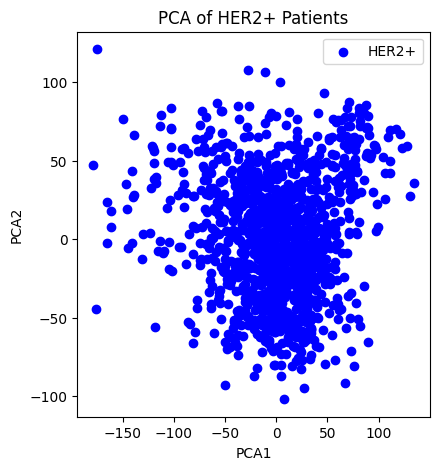

In [14]:
# Plot PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', label='HER2+')
plt.title('PCA of HER2+ Patients')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()


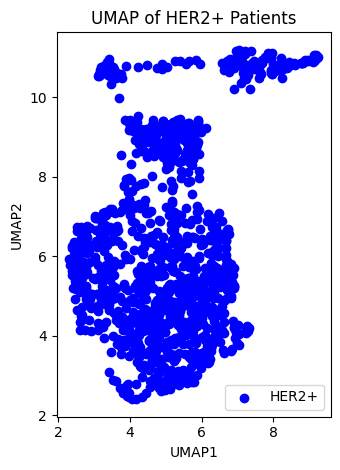

In [15]:
# Plot UMAP results
plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c='blue', label='HER2+')
plt.title('UMAP of HER2+ Patients')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Merge RNA-seq, copy number, and clinical data
merged_data = pd.merge(rna_seq_data, copy_number_data, on='patient_id')
merged_data = pd.merge(merged_data, clinical_data, on='patient_id')

In [17]:
# Select relevant columns for analysis
rna_columns = rna_seq_data.columns[1:]  # Exclude patient_id
copy_number_columns = copy_number_data.columns[1:]  # Exclude patient_id
clinical_columns = ['IHC-HER2', 'FISH-HER2']

In [18]:
clinical_columns

['IHC-HER2', 'FISH-HER2']

In [19]:
# Perform UMAP
reducer = umap.UMAP(n_components=2)  # Use umap.UMAP() to call the class
umap_result = reducer.fit_transform(log_transformed_data)

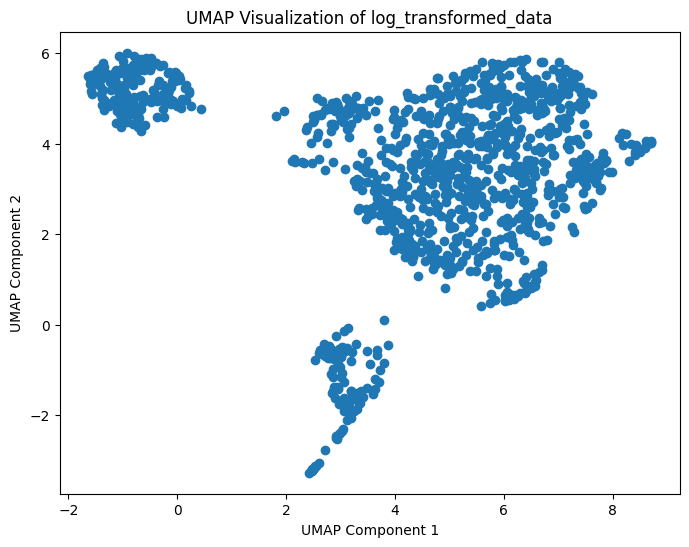

In [20]:
# prompt: plot and visualize umap_result1

plt.figure(figsize=(8, 6))
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.title('UMAP Visualization of log_transformed_data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [21]:
# Calculate correlations between RNA, copy number, and clinical features
# Select only numeric columns before calculating correlations
numeric_data = merged_data.select_dtypes(include=np.number)

# Calculate the correlation matrix using numpy for faster computation
correlation_matrix = np.corrcoef(numeric_data, rowvar=False)

# Convert the numpy array back to a pandas DataFrame for better readability
correlation_matrix_df = pd.DataFrame(correlation_matrix, index=numeric_data.columns, columns=numeric_data.columns)

# Display the correlation matrix
print(correlation_matrix_df)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                                        A1BG      A1CF     A2BP1     A2LD1  \
A1BG                                1.000000  0.116174  0.011273  0.109650   
A1CF                                0.116174  1.000000  0.000721  0.036405   
A2BP1                               0.011273  0.000721  1.000000  0.020635   
A2LD1                               0.109650  0.036405  0.020635  1.000000   
A2ML1                              -0.302110  0.013196 -0.132083 -0.012218   
...                                      ...       ...       ...       ...   
Specimen Freezing Means                  NaN       NaN       NaN       NaN   
Specimen Second Longest Dimension        NaN       NaN       NaN       NaN   
Stage Other                              NaN       NaN       NaN       NaN   
Time between clamping and freezing       NaN       NaN       NaN       NaN   
Time between excision and freezing       NaN       NaN       NaN       NaN   

                                       A2ML1       A2M    A4GAL

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for HER2+ patients
her2_positive_data = merged_data[merged_data['IHC-HER2'] == 'Positive']

# Select only numeric columns and drop columns with NaN entries
numeric_data = her2_positive_data.select_dtypes(include=np.number).dropna(axis=1)

# Calculate the correlation matrix using numpy for faster computation
correlation_matrix = np.corrcoef(numeric_data, rowvar=False)

# Convert the numpy array back to a pandas DataFrame for better readability
correlation_matrix_df = pd.DataFrame(correlation_matrix, index=numeric_data.columns, columns=numeric_data.columns)

# Display the correlation matrix
print(correlation_matrix_df)



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                                   A1BG      A1CF     A2BP1     A2LD1  \
A1BG                           1.000000 -0.173043  0.008044  0.148012   
A1CF                          -0.173043  1.000000 -0.034166 -0.011180   
A2BP1                          0.008044 -0.034166  1.000000  0.131283   
A2LD1                          0.148012 -0.011180  0.131283  1.000000   
A2ML1                         -0.320523  0.081894 -0.070445 -0.015145   
...                                 ...       ...       ...       ...   
Mutation Count                -0.189651 -0.073440  0.024214  0.007840   
Overall Survival (Months)      0.008577 -0.055009  0.049032  0.018679   
Number of Samples Per Patient       NaN       NaN       NaN       NaN   
Sample Initial Weight         -0.034145  0.047073  0.110868  0.073499   
Sample type id                      NaN       NaN       NaN       NaN   

                                  A2ML1       A2M    A4GALT     A4GNT  \
A1BG                          -0.320523 -0.091692 

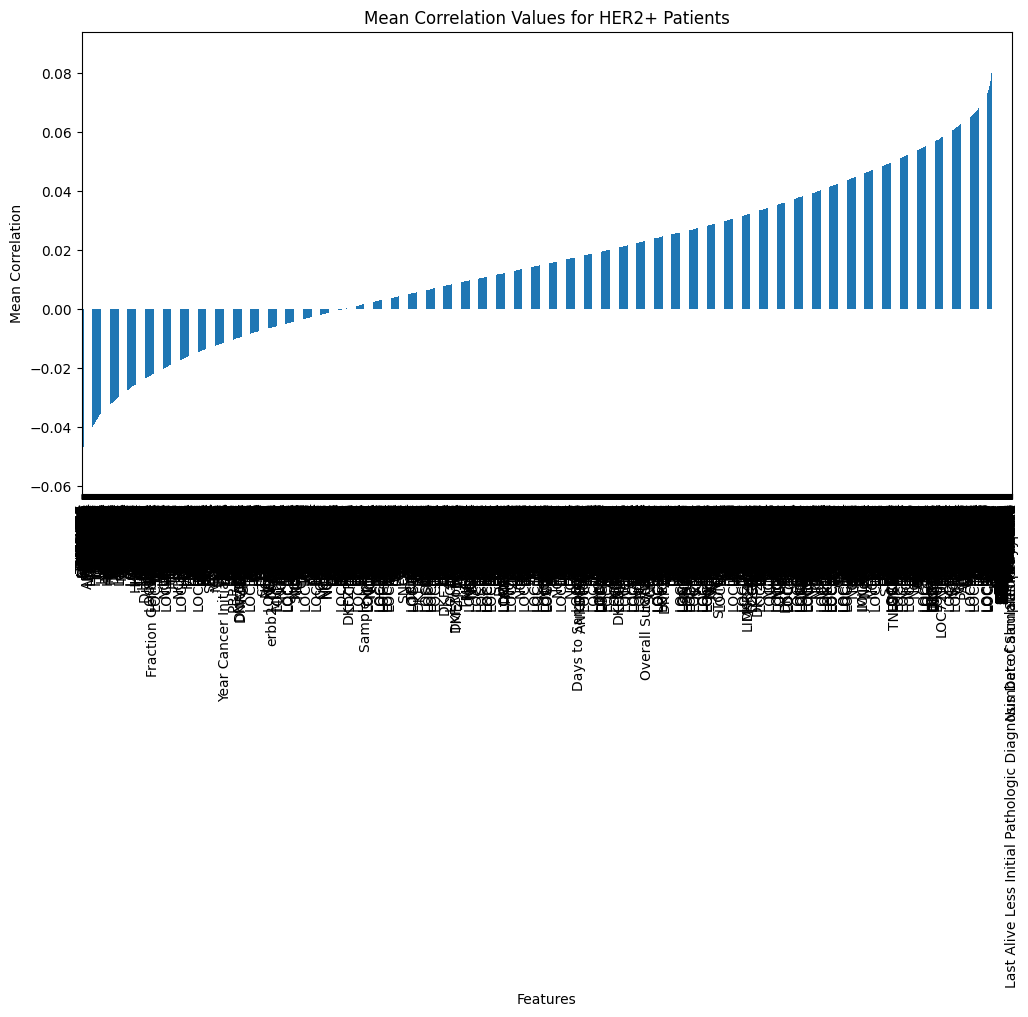

In [26]:
import matplotlib.pyplot as plt

# Visualize the correlation matrix using a bar plot
correlation_matrix_df.mean().sort_values().plot(kind='bar', figsize=(12, 6))
plt.title('Mean Correlation Values for HER2+ Patients')
plt.xlabel('Features')
plt.ylabel('Mean Correlation')
plt.show()

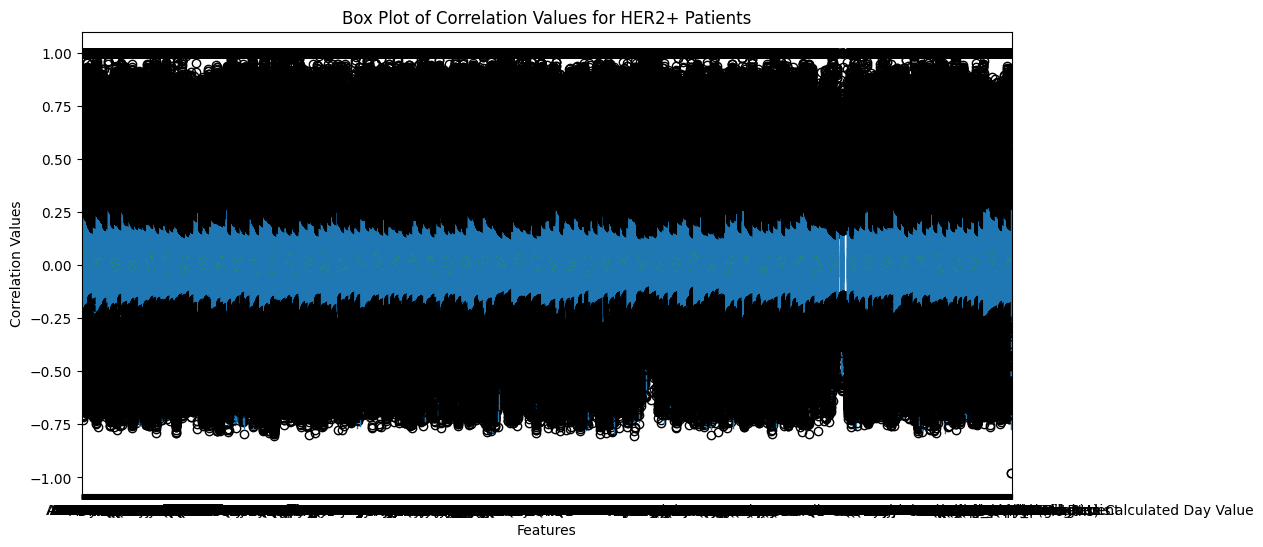

In [27]:
import matplotlib.pyplot as plt

# Visualize the correlation matrix using a box plot
correlation_matrix_df.plot(kind='box', figsize=(12, 6))
plt.title('Box Plot of Correlation Values for HER2+ Patients')
plt.xlabel('Features')
plt.ylabel('Correlation Values')
plt.show()

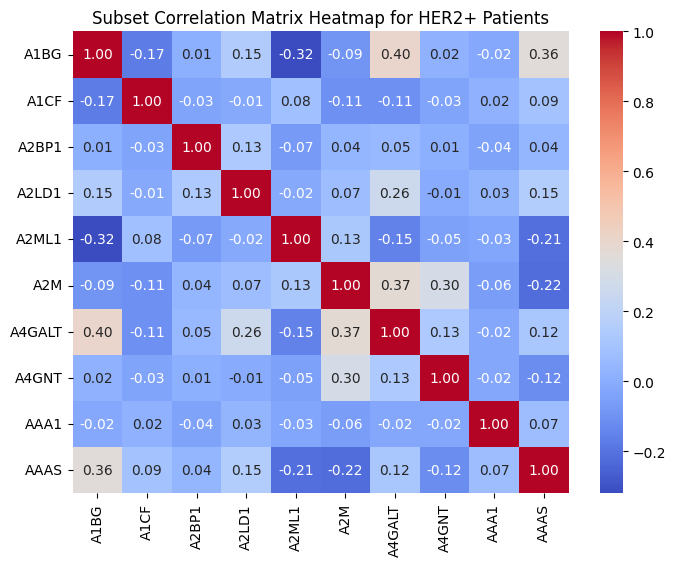

In [29]:
# Select a subset of features for visualization based on the box plot
subset_features = correlation_matrix_df.columns[:10]  # Adjust the number of features as needed
subset_correlation_matrix_df = correlation_matrix_df.loc[subset_features, subset_features]

# Visualize the subset of the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(subset_correlation_matrix_df, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Subset Correlation Matrix Heatmap for HER2+ Patients')
plt.show()

In [ ]:
# Correlation matrix
#Color Intensity: The colors in the heatmap represent the strength of the correlation between pairs of features. Darker colors (closer to red) indicate a stronger positive correlation, while lighter colors (closer to blue) indicate a stronger negative correlation. White or neutral colors indicate little to no correlation.

##Annotations: The numbers in each cell represent the correlation coefficient between the corresponding pair of features. A value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates little to no correlation.

#Diagonal Line: The diagonal line from the top-left to the bottom-right represents the correlation of each feature with itself, which is always 1.

#By examining the heatmap, you can quickly identify which features are strongly correlated with each other. This can help you understand the relationships between different features in your dataset and identify potential patterns or trends.

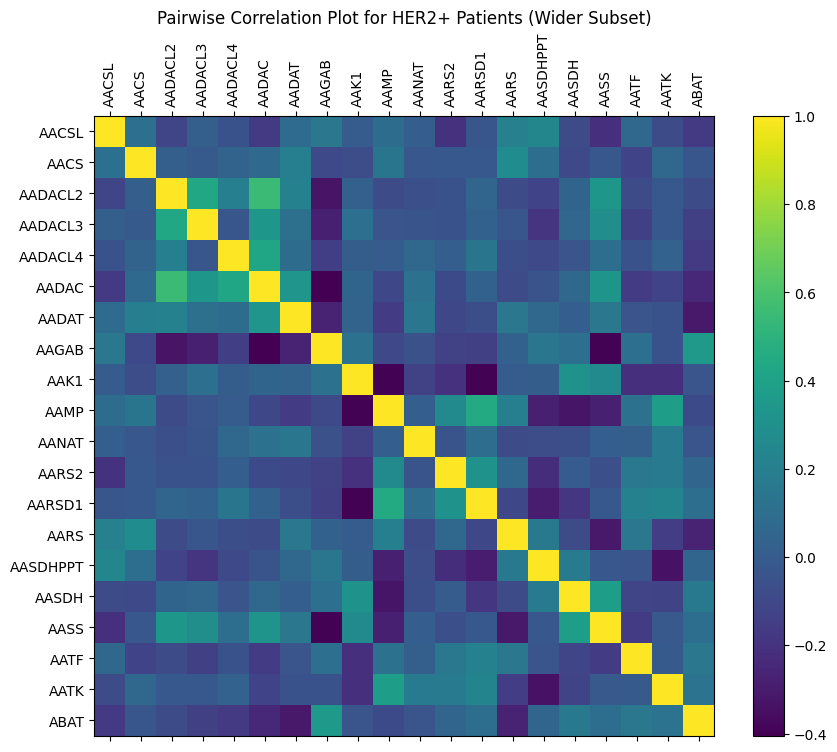

In [33]:
# Select a wider subset of features for visualization
subset_features = correlation_matrix_df.columns[10:30]  # Adjust the range of features as needed
subset_correlation_matrix_df = correlation_matrix_df.loc[subset_features, subset_features]

# Visualize the subset of the correlation matrix using a pairwise correlation plot
plt.figure(figsize=(10, 8))
plt.matshow(subset_correlation_matrix_df, fignum=1)
plt.xticks(range(len(subset_features)), subset_features, rotation=90)
plt.yticks(range(len(subset_features)), subset_features)
plt.colorbar()
plt.title('Pairwise Correlation Plot for HER2+ Patients (Wider Subset)')
plt.show()